# 200 : Rethink

Approaches from phase 1 does not work at all for the new data. We need to rethink our approach.

In [1]:
import numpy as np
import pandas as pd
import logging

import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error 

## Data Collection

In [2]:
# load the source training data
df_source = pd.read_csv('../../data/input/df_train.csv')

print(df_source.shape)
with pd.option_context('display.max_columns', None):
    display(df_source.head(3))

(8763, 49)


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667


In [3]:
# load the competition data
df_competition = pd.read_csv('../../data/input/df_test.csv')

print(df_source.shape)
with pd.option_context('display.max_columns', None):
    display(df_source.head(3))

(8763, 49)


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667


## Data Cleaning

In [4]:
def clean_unused_columns(data:pd.DataFrame) -> pd.DataFrame:
    """
    Remove unused columns from the dataset
    """
    df_clean = data.copy()
    df_clean.drop(columns=['Unnamed: 0'], inplace=True)

    return df_clean

In [5]:
def clean_datatypes(data:pd.DataFrame) -> pd.DataFrame:
    """
    Set the columns to the correct datatypes
    """
    df_clean = data.copy()
    df_clean['time'] = pd.to_datetime(df_clean['time'])

    return df_clean

In [6]:
def clean_valencia_pressure(data:pd.DataFrame) -> pd.DataFrame:
    """
    Replace the nulls in Valencia_pressure with the mode
    """
    df_clean = data.copy()

    # forward fill empty values in Valencia_pressure
    df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'] \
        .fillna(method='ffill')

    return df_clean

In [7]:
def clean_valencia_wind(data:pd.DataFrame) -> pd.DataFrame:
    """
    Clean Valencia wind degrees by striping string & convert to numerical
    """
    df_clean = data.copy()

    df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\\d+)')
    df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])

    return df_clean

In [8]:
def clean_seville_pressure(data:pd.DataFrame) -> pd.DataFrame:
    """
    Remove non-numeric values
    """
    df_clean = data.copy()

    df_clean['Seville_pressure'] = df_clean['Seville_pressure'] \
        .str.extract('(\\d+)') \
        .astype(float)

    return df_clean

In [9]:
def clean_data(dat:pd.DataFrame) -> pd.DataFrame:
    """
    Clean the data
    """
    df_clean = dat.copy()

    df_clean = clean_datatypes(df_clean)
    df_clean = clean_unused_columns(df_clean)

    df_clean = clean_valencia_pressure(df_clean)
    df_clean = clean_valencia_wind(df_clean)
    df_clean = clean_seville_pressure(df_clean)

    return df_clean   

## Exploratory Data Analysis

In [10]:
# create a cleaned dataset to explore
df_explore = clean_data(df_source)

The dataset contains time series data, so we need to investigate if there are any tends and seasonality in the data.

We will start by looking at the data summarized (mean) by month to see the big picture.

In [11]:
# Resample the data to daily frequency
df_train_resampled = df_explore.resample('M', on='time').mean()

# Group the DataFrame by year
year_groups = df_train_resampled.groupby(df_train_resampled.index.year)

# # Create subplots for each year
# fig, axs = plt.subplots(len(year_groups), 1, figsize=(15, 5.5*len(year_groups)))
# for i, (year, data) in enumerate(year_groups):
#     axs[i].plot(data.index, data['load_shortfall_3h'])
#     axs[i].set_xlabel('Time')
#     axs[i].set_ylabel('Load Shortfall 3h')
#     axs[i].set_title(f'Load Shortfall 3h for {year}')

# plt.tight_layout()
# plt.show()

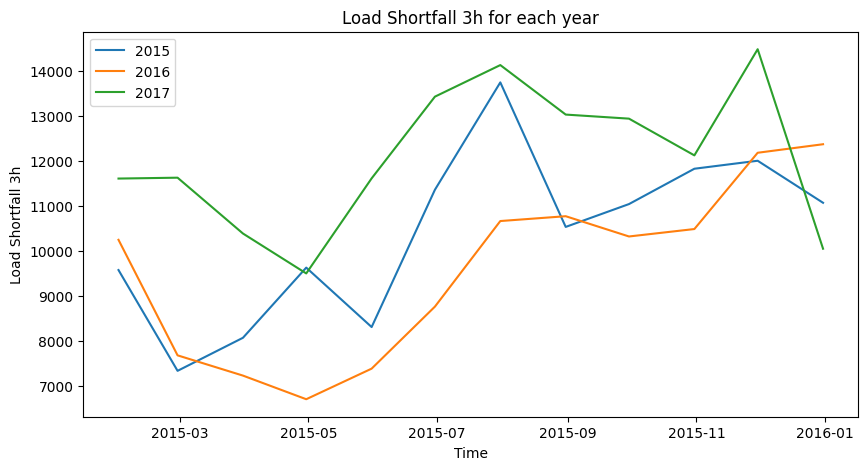

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, (year, data) in enumerate(year_groups):
    ax.plot(data.index - pd.DateOffset(years=i), data['load_shortfall_3h'], label=str(year))

ax.set_xlabel('Time')
ax.set_ylabel('Load Shortfall 3h')
ax.set_title('Load Shortfall 3h for each year')
ax.legend()

plt.show()

We can see that the data is not stationary, there is a clear trend and seasonality.

- The **2016** amd **2017** data track each other well and is a good example of showing that there is clear seasonality in the data.


- The throughout the year the **2016** data is lower by about the same amount compared to the **2017** data indicating that we might expect a year-on-year increase in the shortfall. This shows that there could be a clear trend in the data.

- The **2015** data is following a similar seasonal pattern, but is not tracking the **2016** and **2017** data as well. The trend also does not match with what we see in the other years. We have to be careful when using this data as it might not be representative of the **2018** data we hope to predict. 

- There could be factors causing the data for **2015** to look different, we could experiment with only using the **2016** and **2017** data for training to see if we can get better results.

- Since the data is not stationary with clear trend and seasonality. We will need experiment with removing these to make the data stationary for best results.

- We will probably have to be cautious with the sharp drop in the **2017** data in the last month. We can experiment with excluding this month to see if we can get better results.


## Feature Engineering

In [13]:
df_temp = clean_datatypes(df_source)

In [14]:
def add_date_features(data:pd.DataFrame) -> pd.DataFrame:
    """
    Split the date into its separate parts (years, mont, etc.)
    """
    df_clean = data.copy()

    df_clean['Year'] = df_clean['time'].dt.year
    df_clean['Month'] = df_clean['time'].dt.month
    df_clean['Day'] = df_clean['time'].dt.day
    df_clean['Hour'] = df_clean['time'].dt.hour
    df_clean['Day_of_week'] = df_clean['time'].dt.dayofweek

    return df_clean

In [15]:
def add_season_feature(data:pd.DataFrame) -> pd.DataFrame:
    """
    Add a season feature based on the month.
    """
    df_clean = data.copy()

    # coding for the seasons
    season = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
    
    # add a season column based on the mapping
    df_clean['Season'] = df_clean.time.dt.month.map(season)

    return df_clean

In [16]:
def add_day_features(data:pd.DataFrame) -> pd.DataFrame:
    """
    Add a feature to indicate if it is a weekday
    """
    df_clean = data.copy()
    day_type = []

    day_mapping = {
        0: 'Weekday', 1: 'Weekday', 2: 'Weekday', 3: 'Weekday',
        4: 'Weekday', 5: 'Weekend', 6: 'Weekend'}

    # add a day type based on the mapping
    df_clean['day_type'] = df_clean.time.dt.day_of_week.map(day_mapping)

    return df_clean

In [17]:
def add_lag_feature(data:pd.DataFrame, column:str, lags:int) -> pd.DataFrame:
    """
    Add lag features to the dataset
    """
    df_clean = data.copy()

    for lag in range(1, lags + 1):
        df_clean[f'{column}_lag_{lag}'] = df_clean[column].shift(lag)

    return df_clean

In [18]:
def add_lag_features(data:pd.DataFrame, lags:int) -> pd.DataFrame:
    """Add lag features to the dataset"""

    df_features = data.copy()
    cities = ['Madrid', 'Valencia', 'Seville', 'Bilbao', 'Barcelona']

    measures = [
        'wind_speed',
        'wind_deg',
        'rain_1h',
        'rain_3h',
        'humidity',
        'clouds_all',
        'pressure',
        'snow_3h',
        'weather_id',
        'temp_max',
        'temp_min',
        'temp'
    ]

    for city in cities:
        for feature in measures:
            if f'{city}_{feature}' in df_features.columns:
                df_features = add_lag_feature(df_features, f'{city}_{feature}', lags)
            else:
                logging.warn(f'{city}_{feature} not in dataset')

    return df_features

In [19]:
def add_rolling_average_features(data:pd.DataFrame, window:int) -> pd.DataFrame:
    """
    Add rolling average features to the dataset
    """
    df_features = data.copy()
    cities = ['Madrid', 'Valencia', 'Seville', 'Bilbao', 'Barcelona']

    measures = [
        'wind_speed',
        'wind_deg',
        'rain_1h',
        'rain_3h',
        'humidity',
        'clouds_all',
        'pressure',
        'snow_3h',
        'weather_id',
        'temp_max',
        'temp_min',
        'temp'
    ]

    for city in cities:
        for feature in measures:
            if f'{city}_{feature}' in df_features.columns:
                df_features[f'{city}_{feature}_rolling_avg_{window}'] = df_features[f'{city}_{feature}'].rolling(window=window).mean()
            else:
                logging.warn(f'{city}_{feature} not in dataset')

    return df_features


In [20]:
def feature_engineering(data:pd.DataFrame) -> pd.DataFrame:
    """
    Clean the dataset and add the features
    """
    df_clean = data.copy()

    # define categorical columns
    categorical_columns = [
        'Month', 'Day', 'Hour', 
        'Day_of_week', 'Season', 'Day_type'
    ]

    # perform cleaning and feature engineering
    df_clean = clean_data(df_clean)
    df_clean = add_date_features(df_clean)
    df_clean = add_season_feature(df_clean)
    df_clean = add_day_features(df_clean)

    # # add rolling average features
    # df_clean = add_rolling_average_features(df_clean, 5)
    # df_clean = add_rolling_average_features(df_clean, 10)
    # df_clean = add_rolling_average_features(df_clean, 30)
    # df_clean = add_rolling_average_features(df_clean, 60)
    # df_clean = add_rolling_average_features(df_clean, 90)
    # df_clean = add_rolling_average_features(df_clean, 365)


    # # add lag features
    # df_clean = add_lag_features(df_clean, 10)
    
    # replace empty lag values with 0
    df_clean.fillna(0, inplace=True)

    return pd.get_dummies(
        df_clean, 
        drop_first=True)
    

    # return pd.get_dummies(
    #     df_clean, 
    #     columns=categorical_columns,
    #     drop_first=True)

# clean the dataset and add new features
df_features = feature_engineering(df_source)

with pd.option_context('display.max_columns', None):
    display(df_features.head(3))

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Hour,Day_of_week,Season_Spring,Season_Summer,Season_Winter,day_type_Weekend
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,25.0,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3,3,0,0,1,0
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,25.0,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6,3,0,0,1,0
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,25.0,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9,3,0,0,1,0


## Model Training

#### Model Evaluation Functions

In [21]:
evaluation_results = []

In [22]:
def show_evaluation(y_test, y_predict):
    # calculate the metrics
    mae = mean_absolute_error(y_test, y_predict) 
    mse = mean_squared_error(y_test, y_predict) 
    rmse = np.sqrt(mse) 
    r2 = r2_score(y_test, y_predict)

    print(f'RMSE: {rmse:.3f} | R-squared: {r2:.4f}')

    return rmse, r2

### Prophet

In [23]:
def create_prophet_model(data:pd.DataFrame):
    """
    Create and fit a Prophet model that can be used to predict future
    data.
    """
    # perform feature engineering
    df_train = feature_engineering(data)

    # rename the columns to what prhophet expects
    df_train.rename(columns={'load_shortfall_3h': 'y', 'time': 'ds'}, inplace=True)

    # create the prophet model
    model = Prophet(
        seasonality_mode='multiplicative',
        changepoint_prior_scale=0.05,
        seasonality_prior_scale=0.1,
        interval_width=0.8,
        yearly_seasonality=True)

    # fit the model to the training data
    model.fit(df_train)

    # return the model
    return model

In [24]:
def get_prophet_predictions(model, data:pd.DataFrame):
    """
    Get predictions from the Prophet model
    """
    df_test = data.copy()

    # rename the columns
    df_test.rename(columns={'load_shortfall_3h': 'y', 'time': 'ds'}, inplace=True)

    # make predictions for the future dates
    forecast = model.predict(df_test)

    # extract the relevant columns from the forecast
    predictions = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    return predictions


### All Years

In [25]:
# create the model
prophet_model = create_prophet_model(df_source)

# get the competition data
df_test = feature_engineering(df_competition)

# get the predictions
predictions = get_prophet_predictions(prophet_model, df_test)

12:00:10 - cmdstanpy - INFO - Chain [1] start processing
12:00:11 - cmdstanpy - INFO - Chain [1] done processing


<Axes: xlabel='ds'>

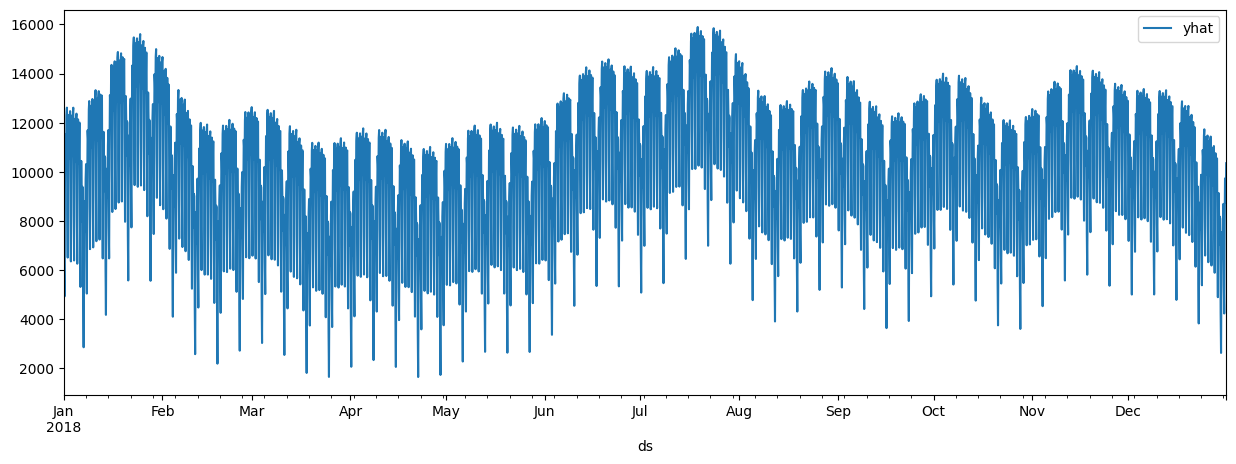

In [26]:
# plot the predictions
predictions.plot(x='ds', y='yhat', kind='line', figsize=(15, 5))

Save the data so we can test it with a Kaggel submission.

In [27]:
df_out = df_test \
    .rename(columns={'time': 'ds'})[['ds']] \
    .merge(predictions[['ds', 'yhat']], on='ds', how='left') \
    .rename(columns={'ds': 'time'}) \
    .rename(columns={'yhat': 'load_shortfall_3h'})

display(df_out)

#Output to csv for Kaggle 
df_out.to_csv("../../data/output/200_all_prophet.csv",index=False)

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10264.384392
1,2018-01-01 03:00:00,6294.693755
2,2018-01-01 06:00:00,4913.775706
3,2018-01-01 09:00:00,9234.111479
4,2018-01-01 12:00:00,11528.622036
...,...,...
2915,2018-12-31 09:00:00,7816.661042
2916,2018-12-31 12:00:00,9725.784003
2917,2018-12-31 15:00:00,9420.600357
2918,2018-12-31 18:00:00,8742.550531


We get a score of`4070.06422` on the public leaderboard. This is not a good good result and puts as at position `74` out of `141` teams.

### Latest Two Years

We have seen in our analysis that the **2015** data is potentially not representative of future years, so we will try and build a model without it.

12:00:12 - cmdstanpy - INFO - Chain [1] start processing
12:00:12 - cmdstanpy - INFO - Chain [1] done processing


<Axes: xlabel='ds'>

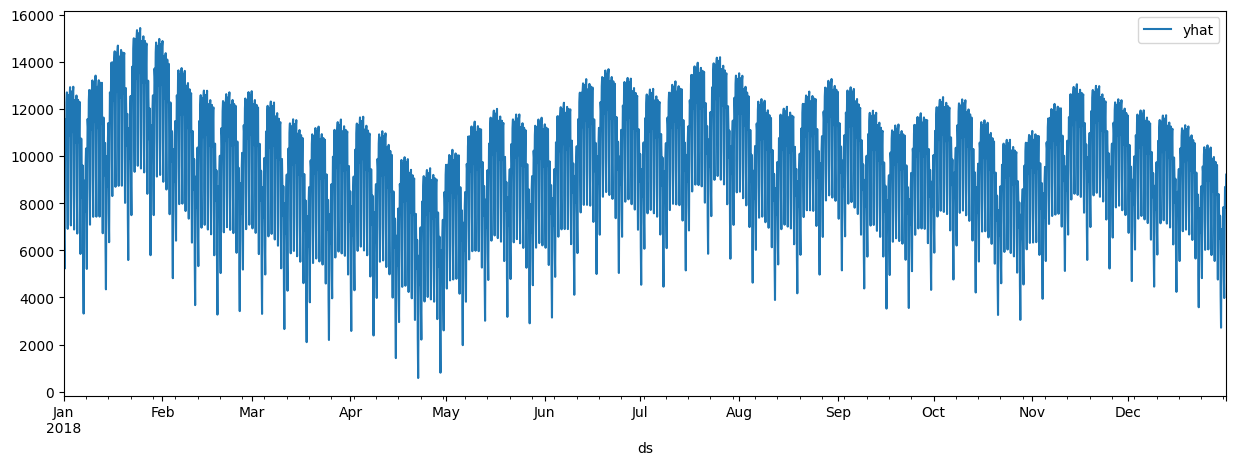

In [28]:
# select last two years
df_train = df_source[df_features['time'] >= '2016-01-01']

# create the model
prophet_model = create_prophet_model(df_train)

# get the competition data
df_test = feature_engineering(df_competition)

# get the predictions
predictions = get_prophet_predictions(prophet_model, df_test)

# plot the predictions
predictions.plot(x='ds', y='yhat', kind='line', figsize=(15, 5))

This plot looks very similar to the plot we saw when we used all the data. This might be an indication that we might not get a better result.

In [29]:
df_out = df_test \
    .rename(columns={'time': 'ds'})[['ds']] \
    .merge(predictions[['ds', 'yhat']], on='ds', how='left') \
    .rename(columns={'ds': 'time'}) \
    .rename(columns={'yhat': 'load_shortfall_3h'})

display(df_out)

#Output to csv for Kaggle 
df_out.to_csv("../../data/output/200_last_two_prophet.csv",index=False)

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10395.579092
1,2018-01-01 03:00:00,6509.308838
2,2018-01-01 06:00:00,5214.163783
3,2018-01-01 09:00:00,9377.811639
4,2018-01-01 12:00:00,11559.807017
...,...,...
2915,2018-12-31 09:00:00,7068.050774
2916,2018-12-31 12:00:00,8688.000772
2917,2018-12-31 15:00:00,8424.989849
2918,2018-12-31 18:00:00,7801.571903


Excluding **2015** data results in a worse score of `4275.24288` on the public leaderboard.

As a final try excluding the last month of **2017** data.

12:02:57 - cmdstanpy - INFO - Chain [1] start processing
12:02:57 - cmdstanpy - INFO - Chain [1] done processing


<Axes: xlabel='ds'>

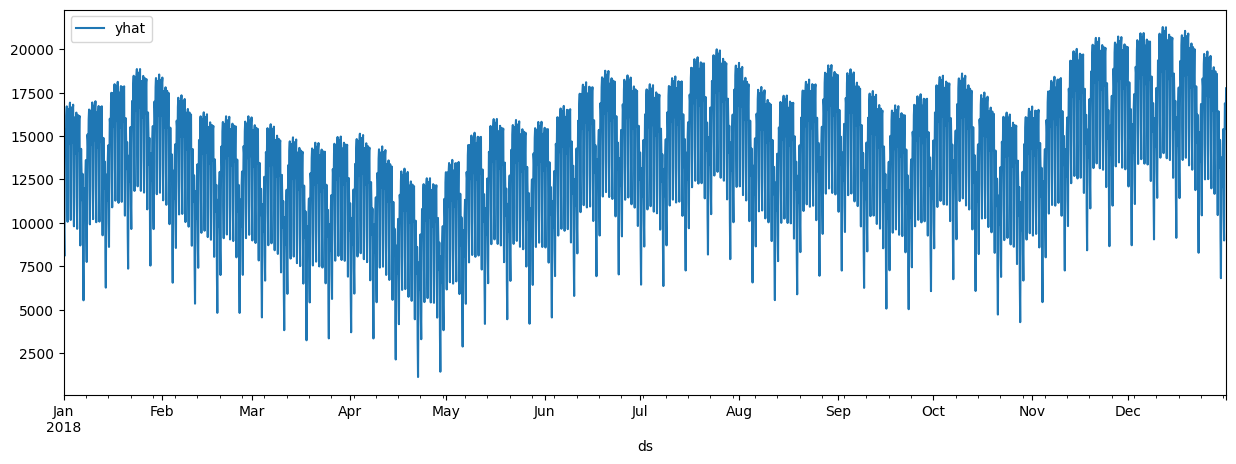

In [33]:
# select last two years, but exclude the last month
df_train = df_source[
    (df_features['time'] >= '2016-01-01') & \
    (df_features['time'] < '2017-12-01')
]

# create the model
prophet_model = create_prophet_model(df_train)

# get the competition data
df_test = feature_engineering(df_competition)

# get the predictions
predictions = get_prophet_predictions(prophet_model, df_test)

# plot the predictions
predictions.plot(x='ds', y='yhat', kind='line', figsize=(15, 5))

In [34]:
df_out = df_test \
    .rename(columns={'time': 'ds'})[['ds']] \
    .merge(predictions[['ds', 'yhat']], on='ds', how='left') \
    .rename(columns={'ds': 'time'}) \
    .rename(columns={'yhat': 'load_shortfall_3h'})

display(df_out)

#Output to csv for Kaggle 
df_out.to_csv("../../data/output/200_last_two_sans_12_prophet.csv",index=False)

,time,load_shortfall_3h
0,2018-01-01 00:00:00,13990.859684
1,2018-01-01 03:00:00,9537.654343
2,2018-01-01 06:00:00,8086.297942
3,2018-01-01 09:00:00,12900.738119
4,2018-01-01 12:00:00,15366.461440
...,...,...
2915,2018-12-31 09:00:00,14205.644151
2916,2018-12-31 12:00:00,16878.343080
2917,2018-12-31 15:00:00,16463.730892
2918,2018-12-31 18:00:00,15398.551332


The predictions for the last month is higher now. But this has drastically reduced the score to `5135.65675` on the public leaderboard.

There is however an interesting idea here that we could try. We could predict the entire **2018** dataset with a baseline model, the use a second model to predict a selected month only and replace this in the base model predicts, then see what influence this has on the Kaggle score.

## Extra Trees